Animating oil dispersion on the Salish Sea Atlantis grid. Original code written by Bec Gordon & Javier Porobic, CSIRO, modified to create an animated GIF

In [1]:
import os
import xarray as xr
import numpy as np
import geopandas as gpd
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [2]:
# salish sea atlantis box shapefile.
shapefile_name = "/ocean/rlovindeer/Atlantis/ssam_oceanparcels/SalishSea/SalishSea_July172019_2/SalishSea_July172019.shp"
data_df = gpd.read_file(shapefile_name)
data_df = data_df.sort_values(by=['BOX_ID'])
box_depth = data_df['BOTZ']
land_boxes = box_depth==0
land_boxes = data_df.index[land_boxes]


In [3]:
# Reading in the file generated by Ocean Parcels

scenario = 'Turn Point Dilbit'
control_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/5b_TurnPoint_Control/outputSalishSea.nc"
data_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/5b_TurnPoint_BranchCode/outputSalishSea.nc"

control = xr.open_dataset(str(control_file), decode_cf=True)
data = xr.open_dataset(str(data_file), decode_cf=True)


In [4]:
def box_totals(data, control, species):
    
    data_all = np.ma.filled(data.variables[species][:,:,:], np.nan)
    data_all_depths = data_all.sum(axis=2)
    
    control_all = np.ma.filled(control.variables[species][:,:,:], np.nan)
    control_all_depths = control_all.sum(axis=2)

    return data_all_depths, control_all_depths

In [5]:
species = 'Chinook_salmon5'

data_num, control_num = box_totals(data, control, species + '_Nums')
data_sN, control_sN = box_totals(data, control, species +'_StructN')
data_rN, control_rN = box_totals(data, control, species +'_ResN')
time = np.ma.filled(data.variables['t'], np.nan)

(108, 130)
108


In [13]:
_cmap = cm.coolwarm #winter #viridis #Paired
file_names = []

land_df = data_df.loc[land_boxes]

for time_index in range(0, num_steps):
   
    time_oil = data_num[time_index]
    time_control = control_num[time_index]
    
    data_df['oiled'] = time_oil
    data_df['control'] = time_control
    data_df.loc[land_boxes, 'oiled'] = 0

    ax = data_df.plot(figsize=(9, 15), column = 'oiled', cmap=_cmap,
        vmin=-0, vmax=100,
        legend=True, legend_kwds={'label': "Change in number of " + species
        },)

    land_df.plot(ax=ax, color='white')
    ax.set_title(time[time_index])

    #plt.tight_layout()
    plot_name = species + '_time_' + str(time_index).zfill(3) + '.png'
    plt.savefig(plot_name)
    file_names.append(plot_name)
    plt.close()

In [14]:
from PIL import Image
import glob
 
# Create the frames
frames = []
imgs = glob.glob("*.png")
imgs.sort() 
for i in imgs:
    new_frame = Image.open(i)
    frames.append(new_frame)


# Save into loop
anim_name = str(scenario) + '_' + species +'.gif'
frames[0].save(anim_name, format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=300, loop=0)

file_name_str = ' '.join(file_names)
os.system('rm ' + file_name_str)

0

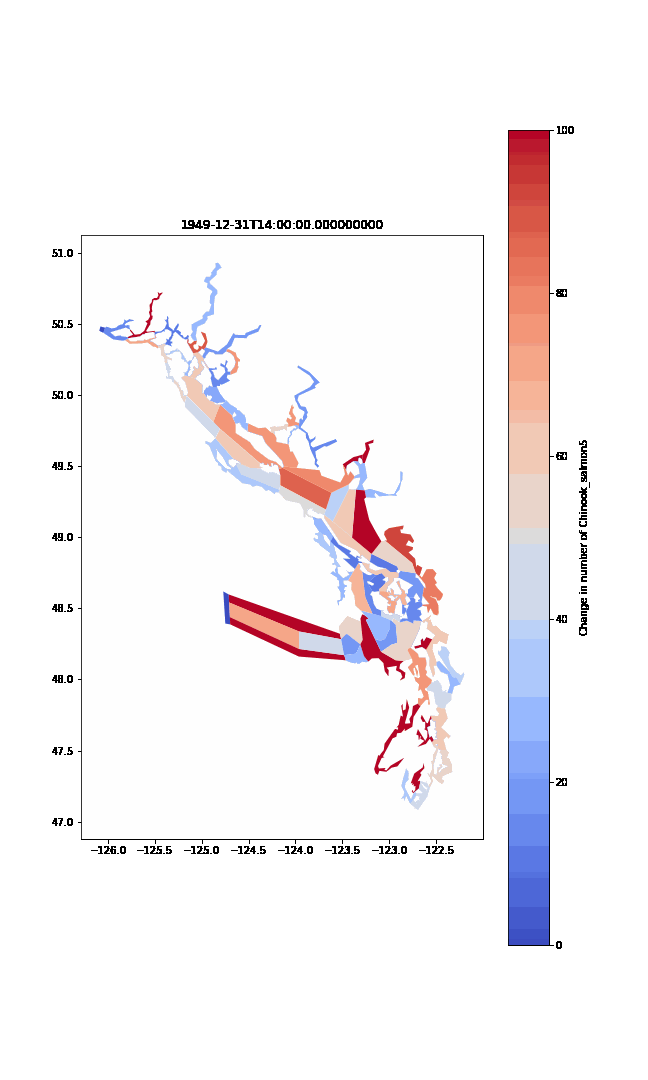

In [15]:
from IPython.display import Image
with open(anim_name,'rb') as anim:
    display(Image(anim.read()))